In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'D:\Data Analytics\Python\Panda\Problem_Solving\ecommerce_clean.csv')

In [2]:
df.head(2)

,Unnamed: 0,index,order_id,order_date,delivered_date,customer_id,customer_name,customer_age,customer_gender,customer_segment,region,state,city,product_id,product_name,category,sub_category,brand,unit_price,quantity,discount_percentage,discount_amount,sales_amount,profit_margin,profit_amount,tax_rate,tax_amount,shipping_cost,shipping_method,total_amount,payment_method,delivery_time_days,order_status,rating,is_repeat_customer,order_year,order_month,order_quarter,order_day_of_week
0,0,0,ORD100722,2020-01-01,2020-01-04,CUST10257,Vikram Kumar,56,Female,Corporate,Central,Madhya Pradesh,Indore,PROD9221,Local Publishers Comics,Books,Comics,Local Publishers,495.34,1,10,49.53,445.80,0.448,199.71,0.12,53.50,56.65,Standard,555.95,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Wednesday
1,1,1,ORD100766,2020-01-14,2020-01-15,CUST10171,Kavita Kumar,57,Male,Consumer,West,Gujarat,Vadodara,PROD6296,Oxford Self-Help,Books,Self-Help,Oxford,1313.37,4,0,0.00,5253.49,0.439,2306.35,0.12,630.42,125.12,Express,6009.03,Debit Card,1,Delivered,5.0,No,2020,1,Q1,Tuesday


### Calculate year-over-year growth in total sales_amount for each quarter (compare same quarter previous year). Then plot a bar chart of the growth % for each order_quarter–order_year combination.

In [20]:
a=df.groupby(['order_year','order_quarter'])\
    .agg(total_sale=('sales_amount','sum'))

a['yoy_growth']=a.total_sale.pct_change()*100

In [23]:
plot_df=a.dropna().reset_index()

In [25]:
plot_df['label']=plot_df.order_year.astype(str)+" Q"+plot_df.order_quarter.astype(str)

In [26]:
plot_df

,order_year,order_quarter,total_sale,yoy_growth,label
0,2020,Q2,897459.56,-12.004613,2020 QQ2
1,2020,Q3,1116581.89,24.415844,2020 QQ3
2,2020,Q4,1375653.73,23.202225,2020 QQ4
3,2021,Q1,1215873.16,-11.614883,2021 QQ1
4,2021,Q2,681763.27,-43.928093,2021 QQ2
5,2021,Q3,1203405.79,76.513732,2021 QQ3
6,2021,Q4,1271181.73,5.632010,2021 QQ4
7,2022,Q1,715507.85,-43.713174,2022 QQ1
8,2022,Q2,1268137.02,77.235934,2022 QQ2
9,2022,Q3,521659.54,-58.864103,2022 QQ3


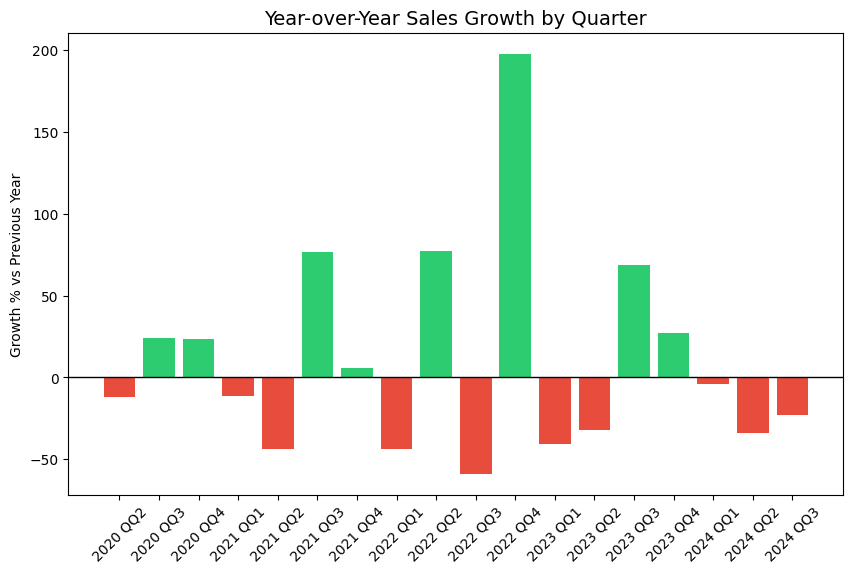

In [44]:
plt.figure(figsize=(10,6))

colors = ['#2ecc71' if x >= 0 else '#e74c3c' for x in plot_df['yoy_growth']]

plt.bar(plot_df.label,plot_df.yoy_growth,color=colors)
plt.axhline(0,color='black',linewidth=1)
plt.ylabel('Growth % vs Previous Year')
plt.title('Year-over-Year Sales Growth by Quarter', fontsize=14)
plt.xticks(rotation=45)
plt.show()